<a href="https://colab.research.google.com/github/CunhaWL/LogPromam/blob/master/Prog1LC2_Proj_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **UFRPE - Licrenciatura em Computação**
Programação 1 (LC2)
Projeto de Algoritmo Genético-Wellington Cunha.

In [ ]:
# UFRPE - Licrenciatura em Computação
# Programação 1 (LC2)
# AG-Ver7
import numpy as np
import random as rd

tamCromossomo = 4 # 4 bits(Gene)
pc = 0.95 # padrão
pm = 0.1  # padrão
numgeracoes = 30
tamPopulacao = 10

# Primeiro: População Inicial zeros.
# Segundo: População gerada aleatoriamente.
p = np.zeros((tamPopulacao, tamCromossomo)) # o numpy cria uma matriz com zeros,
# as linhas são tamPopulação e
# as colunas são tamCromossomos
# print (p)
for i in range(tamPopulacao):  # pecorrer as linhas da matriz
    for j in range(tamCromossomo):  # pecorre as coluna da matriz
        a = rd.uniform(0, 1)  # sortear um numero entre o e 1
        if (a >= 0.5):  # condição de a
            p[i][j] = 1  # define 1 para o gene (i-ésimo, j-ésimo)
        else:
            p[i][j] = 0  # define 0 para o gene
# print(p)
# Variaveis do AG
ind = np.zeros(tamCromossomo)  # temporaria - recebe os genes
individuo = np.zeros(tamPopulacao)  # armazena o valor convertido do binario
Aptidao = np.zeros(tamPopulacao)  # armazena aptidoes de todos os individuos
novageracao = np.zeros((tamPopulacao, tamCromossomo))
geracoes = 0
# Iniciando o AG
while (geracoes < numgeracoes):

    # geracoes = geracoes + 1
    novosindividuos = 0
    #nv = 0
    while novosindividuos < (tamPopulacao - 1):

        # O indice começa em Zero
        # Conversão dos individuos para função seno
        for i in range(tamPopulacao):
            ind[:] = p[i, :]  # ind recebe todos os genes
            conv = 0
            for j in range(tamCromossomo):
                conv = conv + ind[j] * (2 ** (tamCromossomo - (j + 1)))
            individuo[i] = conv  #####
            # individuo[i] = (512/2**tamCromossomo-1)*conv  #####
        # Calculo da Aptidão
        TotalAptidao = 0
        for i in range(tamPopulacao):
            Aptidao[i] = abs((np.sin(individuo[i]) + 1) * 50)
            # função seno
            TotalAptidao = Aptidao[i] + TotalAptidao

        # Seleção dos pais para cruzamento (Metodo Roleta)
        # verificar probabilidade de cada individuo
        # print (TotalAptidao)
        pic = np.zeros(tamPopulacao)
        pitotal = np.zeros(tamPopulacao)
        pic = (1 / TotalAptidao) * Aptidao
        # print (pic)

        # Criando a Roleta
        for i in range(tamPopulacao):
            if (i == 0):
                pitotal[i] = pic[i]
            else:
                pitotal[i] = pic[i] + pitotal[i - 1]
        # print (pitotal)

        # Fazendo os sorteios dos pais de acordo
        # com a probabilidade.
        roleta1 = rd.uniform(0, 1)  # para o pai1
        i = 0
        while (roleta1 > pitotal[i]):
            i += 1
        pai1 = i

        roleta2 = rd.uniform(0, 1)  # para o pai2
        i = 0
        while (roleta2 > pitotal[i]):
            i += 1
        pai2 = i

        while (pai2 == pai1):  # pra nao sortear igual
            roleta2 = rd.uniform(0, 1)
            i = 0
            while (roleta2 > pitotal[i]):
                i += 1
            pai2 = i

        # Seção de Cruzamento
        if (pc > rd.uniform(0, 1)):  # pc é a probabilidade de cruzamento
            c = round(1 + (tamCromossomo - 2) * rd.uniform(0, 1))  
            # O ponto de corte no Cromossomo
            gene11 = p[pai1][0:c]  # p é da população original
            gene12 = p[pai1][c:tamCromossomo]
            gene21 = p[pai2][0:c]
            gene22 = p[pai2][c:tamCromossomo]
            filho1 = np.concatenate((gene11, gene22), axis=None)
            filho2 = np.concatenate((gene21, gene12), axis=None)

            novageracao[novosindividuos, :] = filho1  
            novosindividuos = novosindividuos + 1
            novageracao[novosindividuos, :] = filho2
            novosindividuos = novosindividuos + 1
            # print(novageracao)

        #
        # Seção de Mutação
        if (pm > rd.uniform(0, 1)):  # pm probabilidade de mutação
            d = round(1 + (tamCromossomo - 2) * rd.uniform(0, 1))

            if (novageracao[novosindividuos - 2][d] == 0):
                novageracao[novosindividuos - 2][d] = 1
            else:
                novageracao[novosindividuos - 2][d] = 0
            if (novageracao[novosindividuos - 1][d] == 0):
                novageracao[novosindividuos - 1][d] = 1

            else:
                novageracao[novosindividuos - 1][d] = 0
            # print(novageracao)
        # Identificar a solução maximizada
        indice = Aptidao.argmax()
        elem = individuo[indice]
        #print(elem)
        print(individuo)
        #print(novosindividuos)
        p = novageracao
        #print(p)
        #print(indice)
        #print(geracoes)
        geracoes = geracoes + 1
        print(novageracao)
        print(Aptidao)
        print (TotalAptidao)



### Gráfico da Função Aptidão


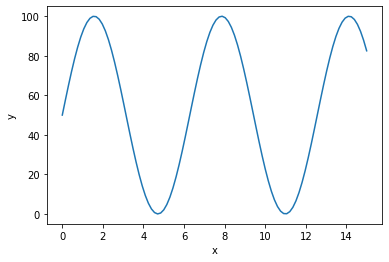

In [ ]:
# UFRPE - Licrenciatura em Computação
# Programação 1 (LC2)
# AG-Ver7 (gráfico da função Aptidão)
import numpy as np
import random as rd
import matplotlib.pyplot as plt
x=np.linspace(0,15,100)
y=abs((np.sin(x) + 1) * 50)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show ()
exit

### Gráfico da Probabilidade Individual


[22.79894446 82.84932994 92.07354924 82.51439201 23.1713541  82.84932994
 12.15987523 12.15987523 99.46791233 82.51439201] valores da Aptidão dos individuos
[10.  7.  1. 15. 12.  7.  4.  4.  8. 15.] individuos
592.5589544838715 Valor das Aptidões


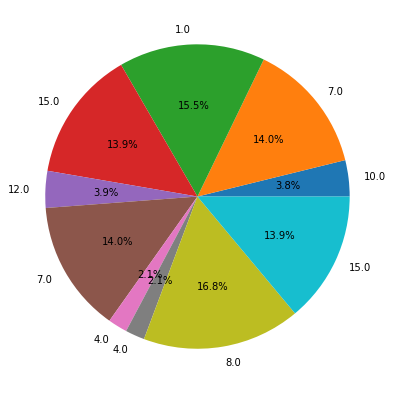

In [59]:
# UFRPE - Licrenciatura em Computação
# Programação 1 (LC2)
# AG-Ver7 - Gráfico da Probabilidade Individual
import numpy as np
import random as rd
import matplotlib.pyplot as plt


tamCromossomo = 4
pc = 0.95  # padrão
pm = 0.1  # padrão
numgeracoes = 20
tamPopulacao = 10

# População Inicial - Gerada de forma aleatória:
p = np.zeros((tamPopulacao, tamCromossomo))  # o numpy cria uma matriz com zeros, as linhas são tamPopulação e
# as colunas são tamCromossomos
# print (p)
for i in range(tamPopulacao):  # pecorrer as linhas da matriz
    for j in range(tamCromossomo):  # pecorre as coluna da matriz
        a = rd.uniform(0, 1)  # sortear um numero entre o e 1
        if (a >= 0.5):  # condição de a
            p[i][j] = 1  # define 1 para o gene (i-ésimo, j-ésimo)
        else:
            p[i][j] = 0  # define 0 para o gene
# print(p)
# Variaveis do AG
ind = np.zeros(tamCromossomo)  # temporaria - recebe os genes
individuo = np.zeros(tamPopulacao)  # armazena o valor convertido do binario
Aptidao = np.zeros(tamPopulacao) # armazena aptidoes de todos os individuos
novageracao = np.zeros((tamPopulacao, tamCromossomo))
# Iniciando o AG

for i in range(tamPopulacao):
    ind[:] = p[i, :]  # ind recebe todos os genes
    conv = 0            
    for j in range(tamCromossomo):
        conv = conv + ind[j] * (2 ** (tamCromossomo - (j + 1)))
    individuo[i] = conv  #####
            #individuo[i] = (512/2**tamCromossomo-1)*conv  #####
        # Calculo da Aptidão
TotalAptidao = 0
for i in range(tamPopulacao):
    Aptidao[i] = abs((np.sin(individuo[i]) + 1) * 50)
            # função seno
    TotalAptidao = Aptidao[i] + TotalAptidao        
# verificar probabilidade de cada individuo
# print (TotalAptidao)
pic = np.zeros(tamPopulacao)
pitotal = np.zeros(tamPopulacao)
pic = (1 / TotalAptidao) * Aptidao
# print (pic)
# print (pitotal)
print(Aptidao, 'valores da Aptidão dos individuos')    
print(individuo, 'individuos')
print(TotalAptidao, 'Valor das Aptidões')
plt.rcParams.update({'font.size':10})#define tamanho da fonte
Prob=individuo
Vperc=pic
plt.figure(figsize=(7,7))
plt.pie(x=Vperc, labels=Prob, autopct='%1.1f%%')
plt.show ()


### Fluxogra de Algoritmo Genético


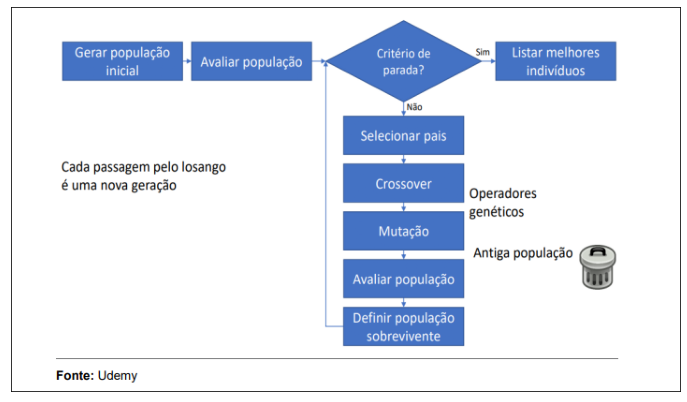

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage.io import imread, imshow
img = plt.imread('/content/ag_fig7.PNG')
plt.figure(figsize=(12,8))
plt.xticks([],[])
plt.yticks([],[])
plt.imshow(img)